In [ ]:
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [ ]:
!mkdir dataset

In [ ]:
import zipfile
import os

# Path to the zip file and the extraction directory
zip_path = '/content/dataset/periodontal_disease.zip'  # Path to the zip file
extract_to = '/content/dataset'  # Directory where the contents will be extracted

# Function to extract zip file
def extract_zip_file(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
        print(f"File diekstraksi ke: {extract_to}")

# Create extraction directory if it doesn't exist
if not os.path.exists(extract_to):
    os.makedirs(extract_to)

# Extract the zip file
extract_zip_file(zip_path, extract_to)

# Optionally, remove the zip file after extraction
os.remove(zip_path)

File diekstraksi ke: /content/dataset


In [ ]:
dataset_dir = '/content/dataset/periodontal_disease'

train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')

train_normal_dir = os.path.join(train_dir, 'normal')
train_inflammation_dir = os.path.join(train_dir, 'inflammation')

In [ ]:
#Number of images for each class
print(f"There are {len(os.listdir(train_dir))} labels for training")
print(f"There are {len(os.listdir(val_dir))} labels for validation")

There are 2 labels for training
There are 2 labels for validation


Sample Normal Image:


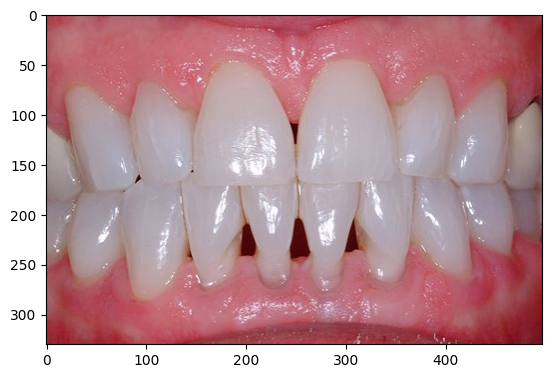


Sample Inflammation Image:


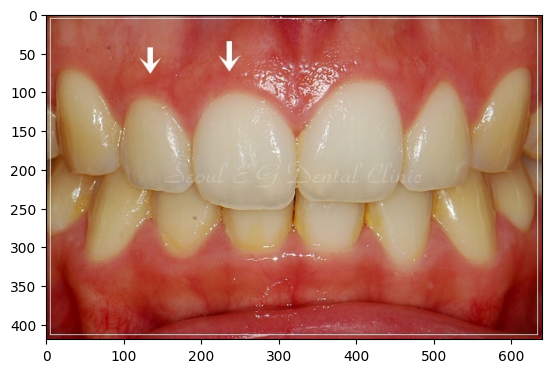

In [ ]:
print("Sample Normal Image:")
plt.imshow(load_img(f"{os.path.join(train_normal_dir, os.listdir(train_normal_dir)[1])}"))
plt.show()

print("\nSample Inflammation Image:")
plt.imshow(load_img(f"{os.path.join(train_inflammation_dir, os.listdir(train_inflammation_dir)[1])}"))
plt.show()

In [ ]:
# Load the first example of a horse
sample_image  = load_img(f"{os.path.join(train_normal_dir, os.listdir(train_normal_dir)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (207, 324, 3)


In [ ]:
# # GRADED FUNCTION: train_val_generators
# def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
#   ### START CODE HERE

#   # Instantiate the ImageDataGenerator class
#   # Don't forget to normalize pixel values and set arguments to augment the images
#   train_datagen = ImageDataGenerator(rescale = 1./255.,
#                                     rotation_range = 40,
#                                     width_shift_range = 0.2,
#                                     height_shift_range = 0.2,
#                                     shear_range = 0.2,
#                                     zoom_range = 0.2,
#                                     horizontal_flip = True)

#   # Pass in the appropriate arguments to the flow_from_directory method
#   train_generator = train_datagen.flow_from_directory(directory = TRAINING_DIR,
#                                                       batch_size = 32,
#                                                       class_mode = 'binary',
#                                                       target_size = (150, 150))

#   # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
#   # Remember that validation data should not be augmented
#   validation_datagen = ImageDataGenerator(rescale = 1./255.)

#   # Pass in the appropriate arguments to the flow_from_directory method
#   validation_generator = validation_datagen.flow_from_directory(directory = VALIDATION_DIR,
#                                                                 batch_size = 32,
#                                                                 class_mode = 'binary',
#                                                                 target_size = (150, 150))
#   ### END CODE HERE
#   return train_generator, validation_generator

# GRADED FUNCTION: train_val_generators

import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

def split_horizontal(img):
    """
    Splits the image into upper and lower halves and
    concatenates them horizontally.
    """
    height = img.shape[0]
    # Calculate the middle point more accurately to ensure equal halves
    mid_point = height // 2

    upper_half = img[:mid_point, :, :]
    lower_half = img[mid_point:, :, :]

    # Concatenate upper and lower halves along width to create a combined image
    combined_img = np.concatenate((upper_half, lower_half), axis=1)

    return combined_img

def custom_preprocessing_function(img):
    """
    Custom preprocessing function to split the image and then return the split image.
    """
    split_img = split_horizontal(img)
    return split_img / 255.0  # Normalize the image

def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    ### START CODE HERE

    # Instantiate the ImageDataGenerator class
    # Don't forget to normalize pixel values and set arguments to augment the images
    train_datagen = ImageDataGenerator(
        rescale = 1./255.,
        rotation_range = 40,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        preprocessing_function = custom_preprocessing_function
    )

    # Pass in the appropriate arguments to the flow_from_directory method
    train_generator = train_datagen.flow_from_directory(
        directory = TRAINING_DIR,
        batch_size = 32,
        class_mode = 'binary',
        target_size = (75, 300)
    )

    # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
    # Remember that validation data should not be augmented
    validation_datagen = ImageDataGenerator(
        rescale = 1./255.,
        preprocessing_function = custom_preprocessing_function
    )

    # Pass in the appropriate arguments to the flow_from_directory method
    validation_generator = validation_datagen.flow_from_directory(
        directory = VALIDATION_DIR,
        batch_size = 32,
        class_mode = 'binary',
        target_size = (75, 300)
    )

    ### END CODE HERE
    return train_generator, validation_generator


In [ ]:
# Test your generators
train_generator, validation_generator = train_val_generators(train_dir, val_dir)
# train_generator, validation_generator = train_val_generators(train_dir, test_dir)

Found 132 images belonging to 2 classes.
Found 44 images belonging to 2 classes.


In [ ]:
import matplotlib.pyplot as plt

def visualize_samples(generator, num_samples=5):
  """Visualizes a few samples from the given generator."""

  images, labels = next(generator)
  for i in range(min(num_samples, images.shape[0])):
    plt.imshow(images[i])
    plt.title(f"Label: {labels[i]}")
    plt.show()

# Call the function with your train_generator
visualize_samples(train_generator)

In [ ]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2024-07-18 15:57:59--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.207, 108.177.125.207, 142.250.157.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  25.4MB/s    in 4.3s    

2024-07-18 15:58:03 (19.6 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
# Import the inception model
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
# GRADED FUNCTION: create_pre_trained_model
def create_pre_trained_model(local_weights_file):
  ### START CODE HERE
  pre_trained_model = InceptionV3(input_shape = (75, 300, 3),
                                  include_top = False,
                                  weights = None)

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = False

  ### END CODE HERE

  return pre_trained_model

In [ ]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 75, 300, 3)]         0         []                            
                                                                                                  
 conv2d_376 (Conv2D)         (None, 37, 149, 32)          864       ['input_5[0][0]']             
                                                                                                  
 batch_normalization_376 (B  (None, 37, 149, 32)          96        ['conv2d_376[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_376 (Activation  (None, 37, 149, 32)          0         ['batch_normalizati

In [ ]:
total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 21,802,784 total parameters in this model.
There are 0 trainable parameters in this model.


In [ ]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.8 and logs.get('val_accuracy')>0.8):
      print("\nReached 80% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
# GRADED FUNCTION: output_of_last_layer
def output_of_last_layer(pre_trained_model):
  ### START CODE HERE
  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)
  ### END CODE HERE

  return last_output

In [ ]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 3, 17, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 3, 17, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [ ]:
# Print the type of the pre-trained model
print(f"The pretrained model has type: {type(pre_trained_model)}")

The pretrained model has type: <class 'keras.src.engine.functional.Functional'>


In [ ]:
# GRADED FUNCTION: create_final_model
def create_final_model(pre_trained_model, last_output):
  # Flatten the output layer to 1 dimension
  x = layers.Flatten()(last_output)

  ### START CODE HERE

  # Add a fully connected layer with 1024 hidden units and ReLU activation
  x = layers.Dense(1024, activation = 'relu')(x)
  # Add a dropout rate of 0.2
  x = layers.Dropout(0.2)(x)
  # Add a final sigmoid layer for classification
  x = layers.Dense(1, activation = 'sigmoid')(x)

  # Create the complete model by using the Model class
  model = Model(inputs = pre_trained_model.input, outputs = x)

  # Compile the model
  model.compile(optimizer = RMSprop(learning_rate=0.0001),
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

  ### END CODE HERE

  return model

In [ ]:
# Save your model in a variable
model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 49,085,345 total parameters in this model.
There are 40,110,081 trainable parameters in this model.


In [ ]:

# Run this and see how many epochs it should take before the callback
# fires, and stops training at 99.9% accuracy
# (It should take a few epochs)
callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 100,
                    verbose = 2,
                    callbacks=callbacks)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 37 and the array at index 1 has size 38

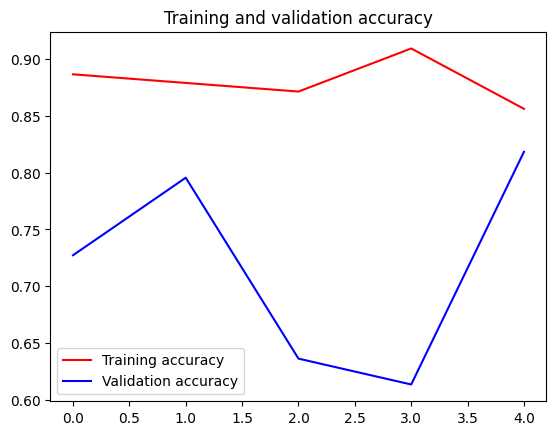

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the training and validation accuracies for each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

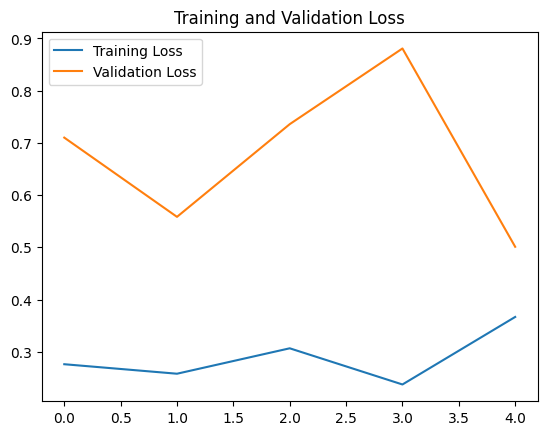

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.legend(loc = 0)
plt.figure()

plt.show()

In [ ]:
# 1. Memuat model yang telah dilatih
model.save('final_model.h5')
loaded_model = tf.keras.models.load_model('final_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# 1. Memuat model yang telah dilatih
model.save('final_model.h5')
loaded_model = tf.keras.models.load_model('final_model.h5')

# 2. Fungsi untuk memuat dan memproses gambar
def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(150, 150))  # Sesuaikan dengan ukuran input model
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch
    img_array /= 255.0  # Normalisasi
    return img_array

# 3. Mengunggah dan memprediksi gambar
def predict_image(image_path, model):
    img = load_and_preprocess_image(image_path)
    prediction = model.predict(img)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    class_label = class_names[predicted_class_index]
    #return class_label

    # Membuat output dalam format JSON
    result = {
        'predicted_class_index': int(predicted_class_index),
        'predicted_class_label': class_label,
        'prediction_scores': prediction.tolist()  # Mengubah array numpy ke list agar dapat diserialisasi ke JSON
    }
    return json.dumps(result, indent=4)


# Daftar nama kelas sesuai dengan indeks yang digunakan saat pelatihan
class_names = ["inflammation", "normal"]

# Path ke gambar uji
image_path = '/content/dataset/periodontal_disease/test/normal/n00000003_000157.jpg'

# Prediksi kelas gambar
predicted_class_label = predict_image(image_path, loaded_model)
print(f'Predicted Class: {predicted_class_label}')

# Prediksi kelas gambar dan mengubah hasil ke JSON
predicted_class_json = predict_image(image_path, loaded_model)
print(predicted_class_json)

1/1 [==============================] - 1s 1s/step
Predicted Class: {
    "predicted_class_index": 0,
    "predicted_class_label": "inflammation",
    "prediction_scores": [
        [
            0.448900431394577
        ]
    ]
}
1/1 [==============================] - 0s 75ms/step
{
    "predicted_class_index": 0,
    "predicted_class_label": "inflammation",
    "prediction_scores": [
        [
            0.448900431394577
        ]
    ]
}
